## Import Librarys

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC

## Load Dataframe

In [2]:
all_data = pd.read_csv('profiles.csv')

In [3]:
all_data.head()
#print(all_data.head())

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


## Mapping Data

The columns that are going to be used, `offspring` and `religion` contain data in a form of generic answers that need to be more specific.

The `offspring` column is mapped to a new `offspring_num` column in the following way:
* `"more than one (many)"` -> `2` 
* `"one"` -> `1`
* `"none"` -> `0`.

In [4]:
#all_data.offspring.unique()

In [5]:
offspring_num_map = {'doesn&rsquo;t have kids, but might want them': 0, 'doesn&rsquo;t want kids': 0, \
    'doesn&rsquo;t have kids, but wants them': 0, 'doesn&rsquo;t have kids': 0, 'wants kids': 0, \
    'has a kid': 1, 'has kids': 2, 'doesn&rsquo;t have kids, and doesn&rsquo;t want any': 0, \
    'has kids, but doesn&rsquo;t want more': 2,  'has a kid, but doesn&rsquo;t want more': 1, \
    'has a kid, and wants more': 1, 'has kids, and might want more': 2, 'might want kids': 0, \
    'has a kid, and might want more': 1, 'has kids, and wants more': 2}
all_data["offspring_num"] = all_data.offspring.map(offspring_num_map)

In [6]:
all_data.dropna(subset=['offspring'], inplace=True)

all_data[['offspring_num', 'offspring']].head()
#print(all_data[['offspring_num', 'offspring']].head(10))

,offspring_num,offspring
0,0.0,"doesn&rsquo;t have kids, but might want them"
1,0.0,"doesn&rsquo;t have kids, but might want them"
3,0.0,doesn&rsquo;t want kids
5,0.0,"doesn&rsquo;t have kids, but might want them"
7,0.0,"doesn&rsquo;t have kids, but wants them"


The `religion` column is mapped to a new `religion_type` column in the following way:
* `"other"` -> `8`
* `"judaism"` ->  `7`
* `"islam"` -> `6` 
* `"hinduism"` -> `5`
* `"christian"` -> `4`
* `"catholic"` ->  `3`
* `"buddhism"` -> `2` 
* `"atheism"` -> `1`
* `"agnostic"` -> `0`.

In [7]:
#all_data.religion.unique()

In [8]:
religion_type_map = {'agnosticism but not too serious about it': 0, 'catholicism': 3,\
    'agnosticism and very serious about it': 0, 'hinduism but not too serious about it': 5, \
    'catholicism and laughing about it': 3, 'other': 8, 'atheism and laughing about it': 1, \
    'agnosticism and laughing about it': 0, 'hinduism and very serious about it': 5, \
    'catholicism but not too serious about it': 3, 'agnosticism and somewhat serious about it': 0, \
    'buddhism but not too serious about it': 2, 'christianity but not too serious about it': 4, \
    'christianity and somewhat serious about it': 4, 'other and laughing about it': 8, 'christianity': 4, \
    'other and somewhat serious about it': 8, 'judaism but not too serious about it': 7, \
    'atheism but not too serious about it': 1, 'atheism': 1, 'other but not too serious about it': 8, \
    'judaism and laughing about it': 7, 'christianity and very serious about it': 4, 'agnosticism': 0, \
    'buddhism and somewhat serious about it': 2, 'catholicism and somewhat serious about it': 3, \
    'atheism and somewhat serious about it': 1, 'atheism and very serious about it': 1, \
    'christianity and laughing about it': 4, 'other and very serious about it': 8, 'judaism': 7, 'buddhism': 2, \
    'buddhism and laughing about it': 2, 'hinduism and somewhat serious about it': 5, \
    'judaism and somewhat serious about it': 7, 'catholicism and very serious about it': 3, \
    'islam but not too serious about it': 6, 'buddhism and very serious about it': 2, 'islam': 6, \
    'judaism and very serious about it': 7, 'hinduism': 5, 'islam and somewhat serious about it': 6, \
    'islam and very serious about it': 6, 'hinduism and laughing about it': 5, 'islam and laughing about it': 6}
all_data['religion_type'] = all_data.religion.map(religion_type_map)

In [9]:
all_data.dropna(subset=['religion'], inplace=True)

all_data[['religion_type','religion']].head(10)
#print(all_data[['religion_type','religion']].head(10))

,religion_type,religion
0,0.0,agnosticism and very serious about it
1,0.0,agnosticism but not too serious about it
5,1.0,atheism
7,4.0,christianity
8,4.0,christianity but not too serious about it
12,8.0,other
14,3.0,catholicism
15,1.0,atheism and laughing about it
19,3.0,catholicism but not too serious about it
21,3.0,catholicism and somewhat serious about it


In [10]:
all_data.income.unique()
#all_data.income.value_counts()
#print(all_data.income.value_counts())

array([     -1,   80000,   50000,   60000,  150000,   40000,   20000,
       1000000,   70000,  250000,  100000,   30000,  500000], dtype=int64)

In [11]:
all_data.age.unique()
#all_data.age.value_counts().tail()
#print(all_data.age.value_counts().tail())

array([ 22,  35,  29,  31,  24,  39,  33,  30,  27,  38,  32,  40,  28,
        26,  34,  25,  46,  42,  45,  23,  55,  21,  50,  59,  51,  20,
        62,  44,  52,  37,  43,  58,  53,  36,  41,  47,  48,  19,  63,
        61,  66,  60,  57,  49,  18,  56,  64,  65,  69,  54,  68,  67,
       109], dtype=int64)

In [12]:
all_data = all_data[all_data.income != -1]

all_data.income.unique()
#all_data.income.head()
#print(all_data.income.head())

array([  80000,   50000,   60000,  150000,   40000,   20000, 1000000,
         70000,  250000,  100000,   30000,  500000], dtype=int64)

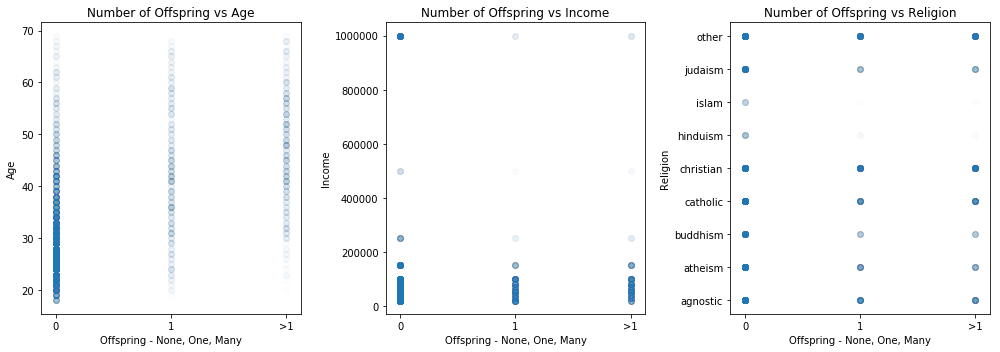

In [13]:
plt.close('all')
offspring_plot_labels = ['0', '1', '>1']
religion_names_plot_labels = ['','agnostic','atheism','buddhism','catholic','christian','hinduism','islam', \
    'judaism','other']

plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 3, 1)
ax1.set_xticks(range(3))
ax1.set_xticklabels(offspring_plot_labels)
plt.scatter(all_data['offspring_num'], all_data['age'], alpha=0.01)
plt.xlabel('Offspring - None, One, Many')
plt.ylabel('Age')
plt.title('Number of Offspring vs Age')
ax2 = plt.subplot(1, 3, 2)
ax2.set_xticks(range(3))
ax2.set_xticklabels(offspring_plot_labels)
plt.scatter(all_data['offspring_num'], all_data['income'], alpha=0.01)
plt.xlabel('Offspring - None, One, Many')
plt.ylabel('Income')
plt.title('Number of Offspring vs Income')
ax3 = plt.subplot(1, 3, 3)
ax3.set_xticks(range(3))
ax3.set_xticklabels(offspring_plot_labels)
ax3.set_yticklabels(religion_names_plot_labels)
plt.scatter(all_data['offspring_num'], all_data['religion_type'], alpha=0.01)
plt.xlabel('Offspring - None, One, Many')
plt.ylabel('Religion')
plt.title('Number of Offspring vs Religion')
plt.tight_layout()
plt.show()

## Outliers and Normalization

Data appears to be skewed by a small number of results in the `age` column data and also the in the `income` column data.

There is a large gap/step in the `income` column data after '250000'.  

In [14]:
all_data.income.unique()
print(all_data.income.value_counts())

20000      1193
100000      625
80000       454
30000       446
50000       413
40000       388
60000       296
70000       288
150000      252
1000000     175
250000       63
500000       21
Name: income, dtype: int64


In [15]:
print(all_data.age.unique())
#all_data.age.value_counts()

[35 29 40 31 25 23 21 50 59 26 37 28 53 30 34 39 36 42 47 33 45 61 32 44
 18 27 52 41 57 22 38 24 20 19 60 43 48 51 66 46 49 69 62 56 65 63 58 54
 55 68 67 64]


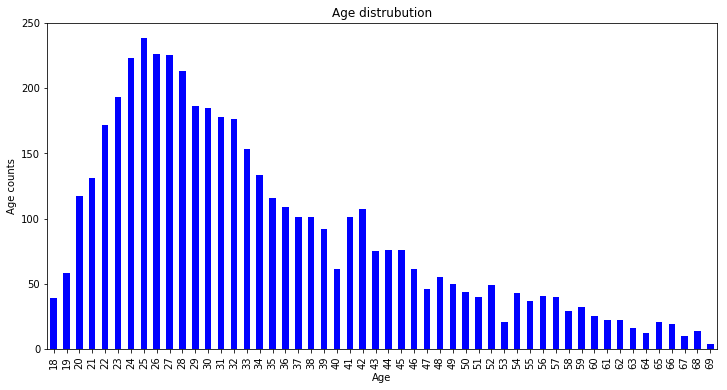

In [16]:
plt.close('all')
plt.figure(figsize=(12, 6))
vl_list = all_data.age.value_counts().sort_index()
vl_list.plot('bar', color='blue')
plt.xlabel('Age')
plt.ylabel('Age counts')
plt.title('Age distrubution')
plt.show()

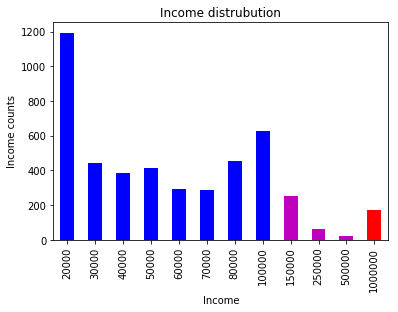

In [17]:
plt.close('all')
vl_list = all_data.income.value_counts().sort_index()
vl_list.plot('bar', color=['b','b','b','b','b','b','b','b','m','m','m','r'])
plt.xlabel('Income')
plt.ylabel('Income counts')
plt.title('Income distrubution')
plt.show()

The data for `income` has a large discrepancy between 1000000 and 250000.

The `age` data also has a large discrepancy between 109 and 64.


In [18]:
removed_outliers_data = all_data[(all_data.age < 70) & (all_data.income <= 1000000)]

## Normalized dataframe

In [19]:
normalized_data = all_data[['offspring_num', 'income', 'age', 'religion_type']]
x = normalized_data.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_data = pd.DataFrame(x_scaled, columns=normalized_data.columns)

print(all_data.income.unique())
print(normalized_data.income.unique())

[  80000   50000   60000  150000   40000   20000 1000000   70000  250000
  100000   30000  500000]
[0.06122449 0.03061224 0.04081633 0.13265306 0.02040816 0.
 1.         0.05102041 0.23469388 0.08163265 0.01020408 0.48979592]


In [20]:
normalized_data.head(10)
#print(normalized_data.head(10))

,offspring_num,income,age,religion_type
0,0.0,0.061224,0.333333,0.000
1,0.0,0.030612,0.215686,0.375
2,0.0,0.040816,0.431373,0.000
3,0.0,0.132653,0.333333,0.000
4,0.0,0.030612,0.254902,0.625
5,0.0,0.020408,0.215686,0.000
6,0.0,0.061224,0.137255,0.375
7,0.5,0.000000,0.098039,1.000
8,0.0,1.000000,0.058824,0.125
9,0.0,0.061224,0.627451,1.000


## Linear regression

In [21]:
lr = LinearRegression()
lr.fit(removed_outliers_data[['offspring_num']], removed_outliers_data['income'])
predict = lr.predict(removed_outliers_data[['offspring_num']])
print('Linear Regression Score :', lr.score(removed_outliers_data[['offspring_num']], removed_outliers_data['income']))

Linear Regression Score : 0.0002294241100517791


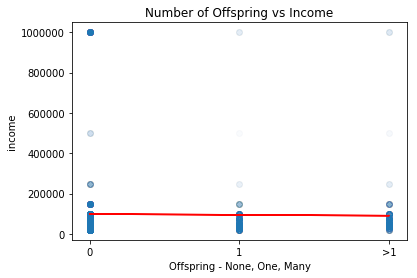

In [22]:
plt.close('all')
ax = plt.subplot()
ax.set_xticks(range(3))
ax.set_xticklabels(offspring_plot_labels)
plt.scatter(removed_outliers_data['offspring_num'], removed_outliers_data['income'], alpha=0.01)
plt.plot(removed_outliers_data['offspring_num'], predict, color='red')
plt.xlabel('Offspring - None, One, Many')
plt.ylabel('income')
plt.title('Number of Offspring vs Income')
plt.show()

In [23]:
lr = LinearRegression()
lr.fit(removed_outliers_data[['offspring_num']], removed_outliers_data['age'])
predict = lr.predict(removed_outliers_data[['offspring_num']])
print('Linear Regression Score :', lr.score(removed_outliers_data[['offspring_num']], removed_outliers_data['age']))

Linear Regression Score : 0.2720793011247591


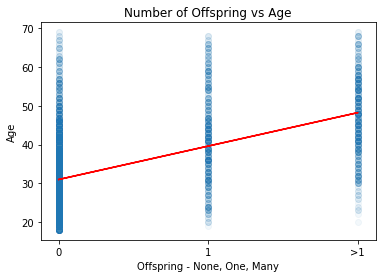

In [24]:
plt.close('all')
ax = plt.subplot()
ax.set_xticks(range(3))
ax.set_xticklabels(offspring_plot_labels)
plt.scatter(removed_outliers_data['offspring_num'], removed_outliers_data['age'], alpha=0.05)
plt.plot(removed_outliers_data['offspring_num'], predict, color='red')
plt.xlabel('Offspring - None, One, Many')
plt.ylabel('Age')
plt.title('Number of Offspring vs Age')
plt.show()

## Multiple Linear Regression

In [25]:
income_vs_age = removed_outliers_data[['income','age','religion_type']]
number_of_offspring = removed_outliers_data['offspring_num']

In [26]:
X_train, X_test, y_train, y_test = train_test_split \
(income_vs_age, number_of_offspring, test_size=0.2, random_state=1)

In [27]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
print('MLR Score with training dataset:', mlr.score(X_train,y_train))
print('MLR Score with test dataset    :', mlr.score(X_test,y_test))

MLR Score with training dataset: 0.2823507179428508
MLR Score with test dataset    : 0.2523572400203993


In [29]:
income_vs_age_labels = np.array(removed_outliers_data['offspring_num']).reshape(-1)
income_vs_age_data = removed_outliers_data[['income', 'age']]
#income_vs_age_data.head() 

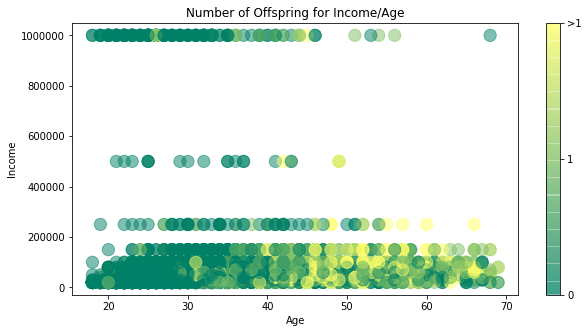

In [30]:
plt.close('all')
plt.figure(figsize=(10, 5))
plt.scatter(removed_outliers_data['age'], removed_outliers_data['income'], \
    c=income_vs_age_labels, s=150, cmap=plt.cm.get_cmap('summer'), alpha=0.5)
cbar = plt.colorbar()
cbar.set_ticks(range(3))
cbar.set_ticklabels(['0', '1', '>1'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Number of Offspring for Income/Age')
plt.show()

## K-Nearest Neighbors

In [31]:
training_data, test_data, training_labels, test_labels = train_test_split \
    (income_vs_age_data, income_vs_age_labels, train_size=0.8, test_size=0.2, random_state=100)

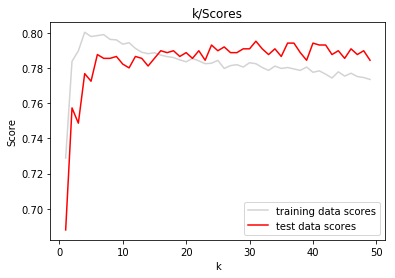

Best k value 30


In [32]:
training_scores = []
test_scores = []
for k in range(1, 50):
    plot_classifier = KNeighborsClassifier(n_neighbors=k)
    plot_classifier.fit(training_data, training_labels)
    training_scores.append(plot_classifier.score(training_data, training_labels))
    test_scores.append(plot_classifier.score(test_data, test_labels))
plt.plot(range(1,50), training_scores, color='lightgrey')
plt.plot(range(1,50), test_scores, color='red')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('k/Scores')
legend_labels = ['training data scores', 'test data scores']
plt.legend(legend_labels, loc=4)
plt.show()
best_k_KNN1 = test_scores.index(max(test_scores))
print('Best k value', best_k_KNN1)

In [33]:
KNN1_classifier = KNeighborsClassifier(n_neighbors=best_k_KNN1)
KNN1_classifier.fit(training_data, training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform')

In [34]:
print('KNN Score with training dataset with k =', best_k_KNN1, ':', \
    KNN1_classifier.score(training_data, training_labels))
print('KNN Score with test dataset with k =', best_k_KNN1, '    :', \
    KNN1_classifier.score(test_data, test_labels))

KNN Score with training dataset with k = 30 : 0.7829856407477649
KNN Score with test dataset with k = 30     : 0.7908992416034669


## K-Nearest Neighbor Regressor

In [35]:
#print(income_vs_age_data)
#print(income_vs_age_labels)

In [36]:
KNN1_regressor = KNeighborsRegressor(n_neighbors=best_k_KNN1, weights='distance')

KNN1_regressor.fit(income_vs_age_data, income_vs_age_labels)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=30, p=2,
          weights='distance')

Test to predict number of offspring for someone aged `59` earning `40000`, the result is they are likely to have `more than one` child

In [37]:
print(KNN1_regressor.predict([[40000, 58]]))

[2.]


## Support Vector Machine

In [38]:
training_data, test_data, training_labels, test_labels = train_test_split \
    (income_vs_age_data, income_vs_age_labels, train_size=0.8, test_size=0.2, random_state=100)

In [39]:
SVM1_classifier = SVC(kernel='rbf', gamma=1)
SVM1_classifier.fit(training_data, training_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
print('SVM Score with training dataset:', SVM1_classifier.score(training_data, training_labels))
print('SVM Score with test dataset    :', SVM1_classifier.score(test_data, test_labels))

SVM Score with training dataset: 0.812787862367922
SVM Score with test dataset    : 0.789815817984832


In [41]:
religion_vs_age_labels = np.array(removed_outliers_data['offspring_num']).reshape(-1)
religion_vs_age_data = removed_outliers_data[['religion_type', 'age']]
#religion_vs_age_data.head() 

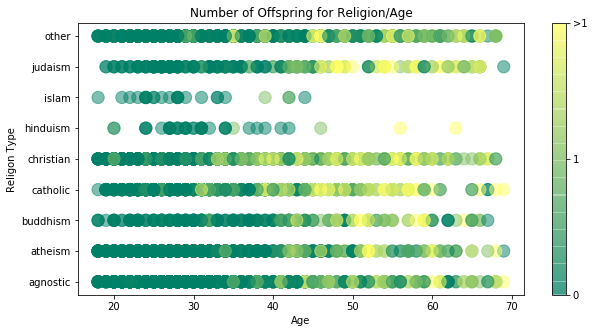

In [42]:
plt.close('all')
plt.figure(figsize = (10, 5))
religion_name = ['','agnostic','atheism','buddhism','catholic','christian','hinduism','islam','judaism','other']
ax4 = plt.subplot()
ax4.set_yticklabels(religion_name)
plt.scatter(removed_outliers_data['age'], removed_outliers_data['religion_type'], \
    c=religion_vs_age_labels, s=150, cmap=plt.cm.get_cmap('summer'), alpha=0.5)
cbar = plt.colorbar()
cbar.set_ticks(range(3))
cbar.set_ticklabels(['0', '1', '>1'])
plt.xlabel('Age')
plt.ylabel('Religon Type')
plt.title('Number of Offspring for Religion/Age')

plt.show()

## K-Nearest Neighbors

In [43]:
training_data, test_data, training_labels, test_labels = train_test_split \
    (religion_vs_age_data, religion_vs_age_labels, train_size=0.8, test_size=0.2, random_state=100)

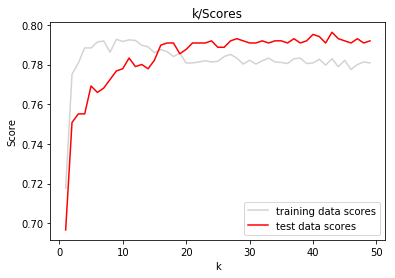

Best k value 42


In [44]:
training_scores = []
test_scores = []
for k in range(1, 50):
    plot_classifier = KNeighborsClassifier(n_neighbors=k)
    plot_classifier.fit(training_data, training_labels)
    training_scores.append(plot_classifier.score(training_data, training_labels))
    test_scores.append(plot_classifier.score(test_data, test_labels))
plt.plot(range(1,50), training_scores, color='lightgrey')
plt.plot(range(1,50), test_scores, color='red')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('k/Scores')
legend_labels = ['training data scores', 'test data scores']
plt.legend(legend_labels, loc=4)
plt.show()
best_k_KNN2 = test_scores.index(max(test_scores))
print('Best k value', best_k_KNN2)
plt.show()

In [45]:
KNN2_classifier = KNeighborsClassifier(n_neighbors=best_k_KNN2)
KNN2_classifier.fit(training_data, training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=42, p=2,
           weights='uniform')

In [46]:
print('KNN Score with training dataset with k =', best_k_KNN2, ':', \
    KNN2_classifier.score(training_data, training_labels))
print('KNN Score with test dataset with k =', best_k_KNN2, '    :', \
    KNN2_classifier.score(test_data, test_labels))

KNN Score with training dataset with k = 42 : 0.7797344892982931
KNN Score with test dataset with k = 42     : 0.7908992416034669


## K-Nearest Neighbor Regressor

In [47]:
#print(religion_vs_age_data)
#print(religion_vs_age_labels)

In [48]:
KNN2_regressor = KNeighborsRegressor(n_neighbors=best_k_KNN2, weights='distance')

KNN2_regressor.fit(religion_vs_age_data, religion_vs_age_labels)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=42, p=2,
          weights='distance')

Test to predict number of offspring for someone who is `catholic` aged `45`, the result is they are likely to have at least `one` child.

In [49]:
print(KNN2_regressor.predict([[3, 45]]))

[1.]


## Support Vector Machine

In [50]:
training_data, test_data, training_labels, test_labels = train_test_split \
    (religion_vs_age_data, religion_vs_age_labels, train_size = 0.8, test_size = 0.2, random_state = 100)

In [51]:
SVM2_classifier = SVC(kernel='rbf', gamma=1)
SVM2_classifier.fit(training_data, training_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
print('SVM Score with training dataset:',SVM2_classifier.score(training_data, training_labels))
print('SVM Score with test dataset    :',SVM2_classifier.score(test_data, test_labels))

SVM Score with training dataset: 0.8043890544567868
SVM Score with test dataset    : 0.7768147345612134
